## 1日の中で時間ごとの歩数の遷移をモデル化する

In [98]:
%matplotlib inline
import random
import numpy
import matplotlib.pylab as plt

### 杉山先生がランダム9人の10日間の歩数を時間ごとに出してはった

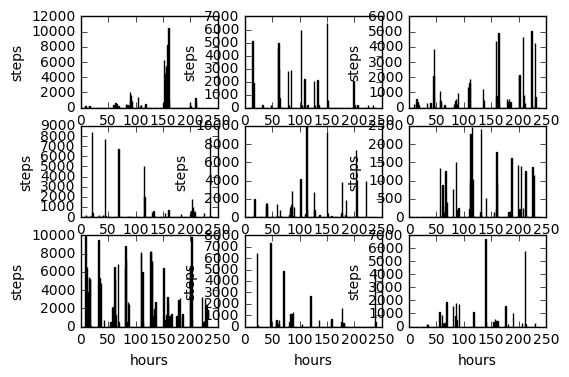

In [82]:
f = open('datasets.npz', 'rb')
dataset = numpy.load(f)
X = dataset['all']

f, axes = plt.subplots(3, 3)
for i in range(3):
    for j in range(3):
        datasets = X[random.randint(0, X.shape[0] - 1)]
        # print 'dataset: ', dataset
        axes[i][j].bar(xrange(240), datasets)
        axes[i][j].set_xlabel('hours')
        axes[i][j].set_ylabel('steps')
plt.show()

### 10日の中で1時間ごとの歩数のヒストグラムを作成

In [266]:
#print X.shape
daily_steps = X
#print daily_step.shape
daily_step = daily_steps[daily_steps != 0.0]
#daily_steps.reshape(-1,)
#numpy.ravel(daily_steps)
#print daily_steps.shape

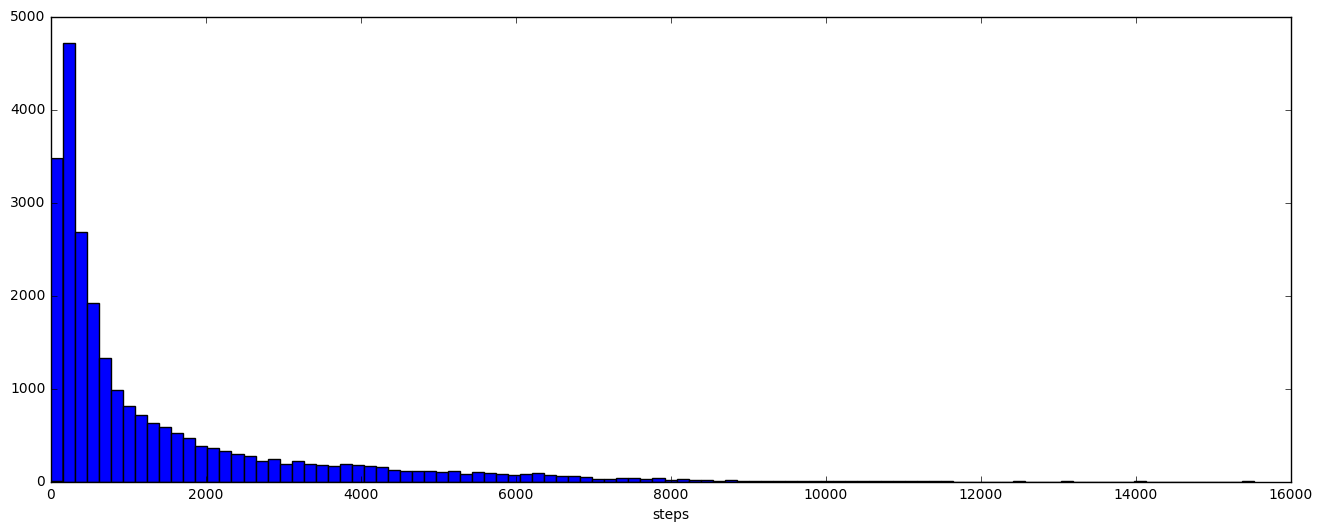

In [267]:
plt.figure(figsize=(16,6))
plt.hist(daily_step, bins=100)
plt.xlabel('steps')
#plt.xticks([156, 495, 1008, 1717, 2742, 4030, 5609, 8166])
plt.show()

In [268]:
print numpy.max(daily_step)

15520.7


### 歩数を人の状態として捉えるためにK-meansでクラスタリング

In [269]:
import scipy.cluster

#daily_step_1d = daily_step.reshape((-1, ))
#print daily_step_1d.shape
#とりあえずk=8でやる
codebook, destortion = scipy.cluster.vq.kmeans(daily_step, 8)
#ちなみに16クラスタ、32クラスタでもクラスタリング可能っぽい
#codebook, destortion = scipy.cluster.vq.kmeans(daily_step_1d, 8)
codebook = numpy.sort(codebook)
print codebook

#code, dist = scipy.cluster.vq.vq(daily_step_1d, codebook)
#print code, dist

[  181.19004822   554.90136719  1082.95385742  1745.42126465  2659.33032227
  3935.85424805  5694.328125    8223.57128906]


In [380]:
import collections

code, dist = scipy.cluster.vq.vq(daily_step, codebook)
print collections.Counter(code)

Counter({0: 9359, 1: 5040, 2: 2932, 3: 2315, 4: 1751, 5: 1519, 6: 1156, 7: 405})
173.238


In [386]:
clus0 = []
clus1 = []
clus2 = []
clus3 = []
clus4 = []
clus5 = []
clus6 = []
clus7 = []

for i, j in zip(code, daily_step):
    if i == 0:
        clus0.append(j)
    elif i == 1:
        clus1.append(j)
    elif i == 2:
        clus2.append(j)
    elif i == 3:
        clus3.append(j)
    elif i == 4:
        clus4.append(j)
    elif i == 5:
        clus5.append(j)
    elif i == 6:
        clus6.append(j)
    elif i == 7:
        clus7.append(j)

In [398]:
print max(clus7)

15520.7


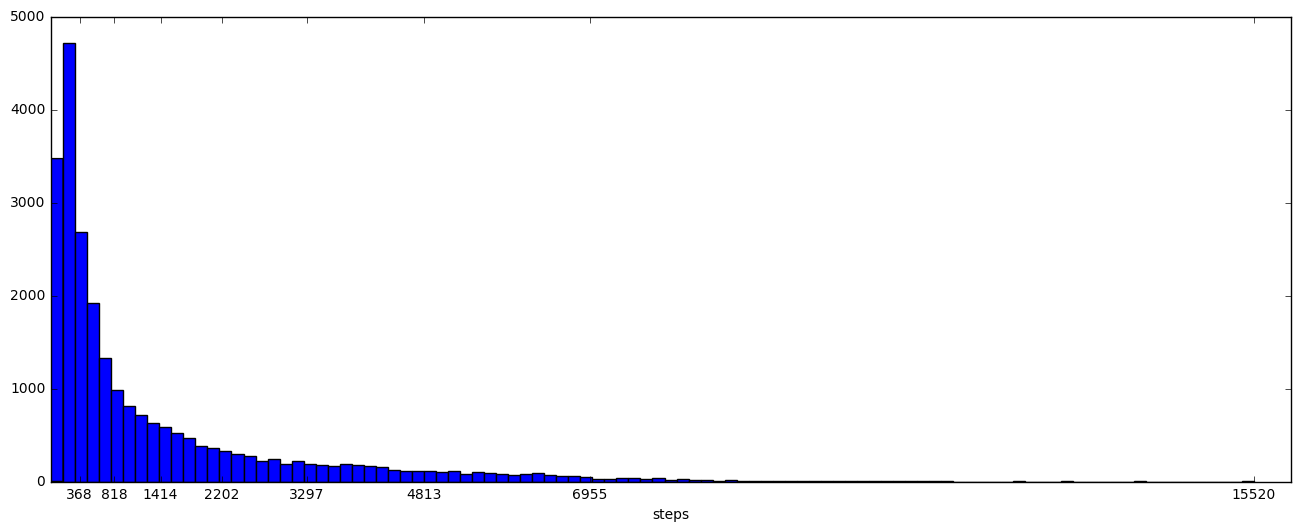

In [399]:
plt.figure(figsize=(16,6))
plt.hist(daily_step, bins=100)
plt.xlabel('steps')
plt.xticks([368, 818, 1414, 2202, 3297, 4813, 6955, 15520])
plt.show()

### 1日8000歩達成した人と未完の人を分けて１日のクラスタ遷移を見る
使ってない(7/7現在)

In [227]:
#まず1日8000歩達成した人としていない人を分けよう
kampo_daily = numpy.zeros((0, 24))
mikan_daily = numpy.zeros((0, 24))

for step in daily_step:
    if numpy.sum(step) >= 8000:
        kampo_daily = numpy.vstack((kampo_daily, step))
        
    else:
        mikan_daily = numpy.vstack((mikan_daily, step))

(142, 24)
(562, 24)


In [238]:
kampo_tra = numpy.zeros((0, 24))
mikan_tra = numpy.zeros((0, 24))

#1日8000歩以上歩いた人
for name in kampo_daily:
    code, dist = scipy.cluster.vq.vq(name, codebook)
    kampo_tra = numpy.vstack((kampo_tra, code))
    
for name in mikan_daily:
    code, dist = scipy.cluster.vq.vq(name, codebook)
    mikan_tra = numpy.vstack((mikan_tra, code))
    
print "kampo user: "
for i in range(3):
    print kampo_tra[random.randint(0, kampo_tra.shape[0] - 1)]

print "mikan user: "
for i in range(3):
    print mikan_tra[random.randint(0, mikan_tra.shape[0] - 1)]

kampo user: 
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  7.  1.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  3.  0.  0.  0.  6.
  0.  0.  5.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  6.  6.  1.  0.  0.]
mikan user: 
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  0.  0.  0.]


### 10日間の中で遷移パターンに落とし込む

In [287]:
# まずは10日の1時間ごとのデータを24時間ごとに分割
test_ary = daily_steps
#print test_ary.shape[0]
test_ary = test_ary.reshape((-1, 24))
print daily_steps.shape
print test_ary.shape

(704, 240)
(7040, 24)


In [292]:
# 24時間ごとのデータに対して遷移パターンを作成
daily_trans = numpy.zeros((0, 24))

for name in test_ary:
    code, dist = scipy.cluster.vq.vq(name, codebook)
    daily_trans = numpy.vstack((daily_trans, code))
    
print daily_trans.shape
#print test_ary[1]
#print daily_trans[1]

(7040, 24)


In [340]:
# 編集距離を用いてward法でクラスタリング
import sys
sys.setrecursionlimit(10000)

pdis = scipy.spatial.distance.pdist(daily_trans, lambda i, j: Levenshtein.distance(','.join(map(str,i)), ','.join(map(str,j))))
# resultはscipyのward法でクラスタリングした結果
#result = scipy.cluster.hierarchy.ward(pdis)
result = scipy.cluster.hierarchy.ward(pdis)

In [410]:
print daily_trans.shape
print result.shape

(7040, 24)
(7039, 4)


{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',

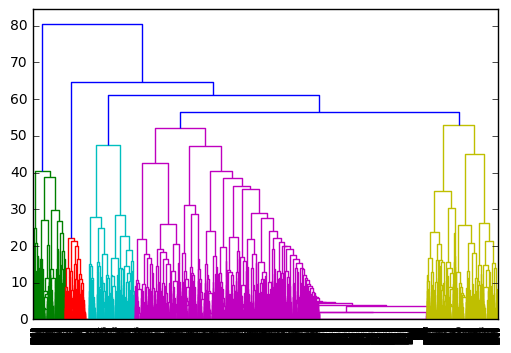

In [408]:
scipy.cluster.hierarchy.dendrogram(result)
#scipy.cluster.hierarchy.dendrogram(result, p=10, truncate_mode='lastp')

### このクラスタリングが人が見てわかるクラスタリングになっているか確認する

In [412]:
# とりあえず上図の色分けにしたがって5クラスタでデータ分ける
print scipy.cluster.hierarchy.leaves_list(result).shape

(7040,)


### 適当に１日の歩数遷移を作ってみて試す

In [ ]:
#とりあえず達成組から1個データ持ってこよう
x = kampo_tra[:1, :]

